In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import datetime
from datetime import datetime 
import matplotlib.dates as mdates 
#import YearLocator, MonthLocator, DateFormatter 

import netCDF4
from netCDF4 import Dataset


import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

import xarray as xr 
import rioxarray
import datetime as dt

from shapely.geometry import box, mapping
from rasterio import features
from affine import Affine
import scipy.interpolate

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import h5netcdf
import scipy  
import os

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [172]:
#get both datasets to have same number of datapoints
lake = 'itaipu'

#grace
ds_g = pd.read_csv( 'E:/internship 2022/data/GRACE/csv_grace/seasonal/' + lake +'.csv')

ds_g['datetime']=pd.to_datetime(ds_g['date'])
df1_a = ds_g.resample('MS', on= 'datetime').mean()

ds_g.to_csv('E:/internship 2022/data/GRACE/csv_grace/seasonal/monthly/'+lake+'.csv')


OSError: Cannot save file into a non-existent directory: 'E:\internship 2022\data\GRACE\csv_grace\seasonal\monthly'

In [2]:
#altimetry
lake = 'frunas'

ds_a = pd.read_csv('E:/internship 2022/data/csv_date_height/'+lake+'.csv')

ds_a['datetime']=pd.to_datetime(ds_a['date'])
df1_a = ds_a.resample('MS', on= 'datetime').mean()

df1_a.to_csv('E:/internship 2022/data/csv_date_height/monthly/'+lake+'.csv')

In [3]:
# join interpolated height csv and grace date to match up on date
height ='E:/internship 2022/data/csv_date_height/monthly/' + lake + '.csv'
grace = 'E:/internship 2022/data/GRACE/csv_grace/seasonal/' + lake +'.csv'

ht = pd.read_csv(height)
gr = pd.read_csv(grace)

In [4]:
dataframe = pd.concat(map(pd.read_csv, [height, grace]), ignore_index = True)
print (dataframe)

       datetime    height  error  Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0    2002-01-01  765.2275    NaN         NaN         NaN         NaN   
1    2002-02-01       NaN    NaN         NaN         NaN         NaN   
2    2002-03-01       NaN    NaN         NaN         NaN         NaN   
3    2002-04-01       NaN    NaN         NaN         NaN         NaN   
4    2002-05-01       NaN    NaN         NaN         NaN         NaN   
..          ...       ...    ...         ...         ...         ...   
442         NaN       NaN    NaN    202108.0      2021.0         8.0   
443         NaN       NaN    NaN    202109.0      2021.0         9.0   
444         NaN       NaN    NaN    202110.0      2021.0        10.0   
445         NaN       NaN    NaN    202111.0      2021.0        11.0   
446         NaN       NaN    NaN    202112.0      2021.0        12.0   

          date       tws  
0          NaN       NaN  
1          NaN       NaN  
2          NaN       NaN  
3          NaN       NaN  


In [ ]:
dataframe.to_csv('E:/internship 2022/data/merged_seasonal/'+lake+'.csv')

Plotting correlation between data and linear regression

In [5]:
lake_name = "frunas"
merge = pd.read_csv('E:/internship 2022/data/merged_seasonal/'+lake_name+'_merged.csv')
plot_merge = merge.dropna()

x= plot_merge['height']
y= plot_merge['tws']

In [35]:
#x = merge['height']
#  #y= merge['tws']

# plot_merge = merge.dropna()

# x= plot_merge['height']
# y= plot_merge['tws']

# plt.scatter(x,y)
# plt.xlabel("Reservior Height (m)")
# plt.ylabel ("Total Water Storage (cm)")
# plt.title ("Correlation between Reservior Height and TWS at "+lake_name )
# plt.show()


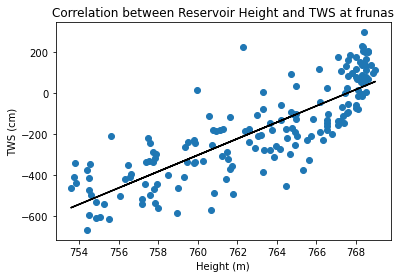

the R value is 0.8274
y= 40.13 x + -30804.64


In [8]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope*x + intercept

mymodel = list(map(myfunc,x))

plt.scatter(x, y)
plt.plot(x, mymodel, color = 'black')
plt.xlabel("Height (m)")
plt.ylabel ("TWS (cm)")
plt.title ("Correlation between Reservoir Height and TWS at "+lake_name )
plt.show()

#get r value to see how well data fits in linear regression
print('the R value is', round(r,4))
print ('y=', round(slope,2), 'x +', round(intercept,2) )

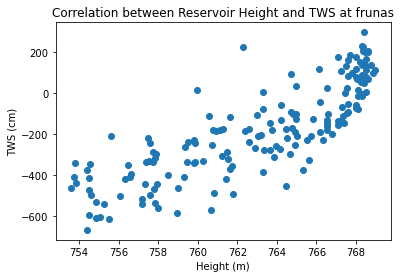

In [10]:
plt.scatter(x, y)
plt.xlabel("Height (m)")
plt.ylabel ("TWS (cm)")
plt.title ("Correlation between Reservoir Height and TWS at "+lake_name )
plt.show()

In [12]:
lake_name = "frunas"
merge = pd.read_csv('E:/internship 2022/data/merged_seasonal/'+lake_name+'_merged.csv')
plot_merge = merge.dropna()
plot_merge ['date']= pd.to_datetime(plot_merge['date'])
merge ['date']= pd.to_datetime(merge['date'])


df1 = pd.DataFrame({'date':merge['date'], 'height': merge['height']})
df2 = pd.DataFrame({'date':merge['date'], 'tws': merge['tws']})




C:\Users\Jessica Besnier\AppData\Local\Temp\ipykernel_5936\3718557355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_merge ['date']= pd.to_datetime(plot_merge['date'])


C:\Users\Jessica Besnier\AppData\Local\Temp\ipykernel_5936\1838611791.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df1.date, rotation=0)


Text(0, 0.5, 'TWS (cm)')

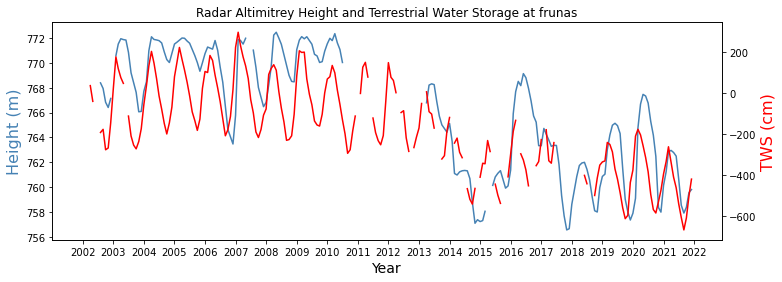

In [14]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize = (12,4))

#add first line to plot
ax.plot(df1.date, df1.height + 3.5, color=col1)
ax.set_title("Radar Altimitrey Height and Terrestrial Water Storage at "+ lake_name)

#add x-axis label
ax.set_xlabel('Year', fontsize=14)
ax.set_xticklabels(df1.date, rotation=0)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


#add y-axis label
ax.set_ylabel('Height (m)', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df2.date, df2.tws, color=col2)

#add second y-axis label
ax2.set_ylabel('TWS (cm)', color=col2, fontsize=16)